<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/opencv-projects-and-guide/ocr-works/04_image_pdf_preprocessing_with_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image PDF preprocessing with OpenCV

##Setup

In [ ]:
%%shell

sudo apt install tesseract-ocr
pip install tesseract
pip install pytesseract
pip install Pillow==9.0.0

Just restart the colab environment.

In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
!tesseract --version

In [2]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [3]:
image_name = 'sample1.png'

## Preprocessing using OpenCV

We will write basic functions for different preprocessing methods 
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching. 

Different methods can come in handy with different kinds of images. 

In [4]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

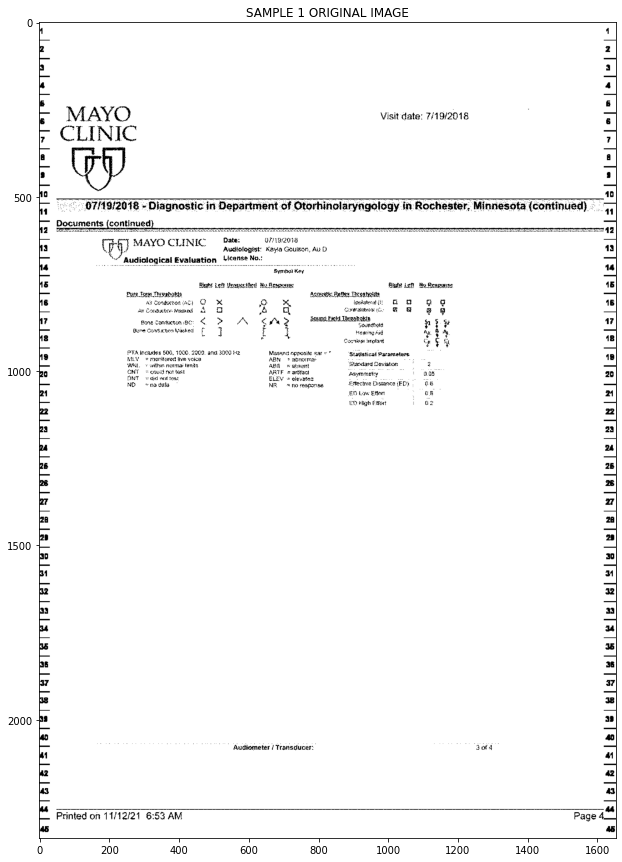

In [11]:
# Plot original image
image = cv2.imread('sample1.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(30,15))
plt.imshow(image)
plt.title('SAMPLE 1 ORIGINAL IMAGE')
plt.show()

In [12]:
# Preprocess image 
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise = remove_noise(gray)
dilated = dilate(gray)

images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

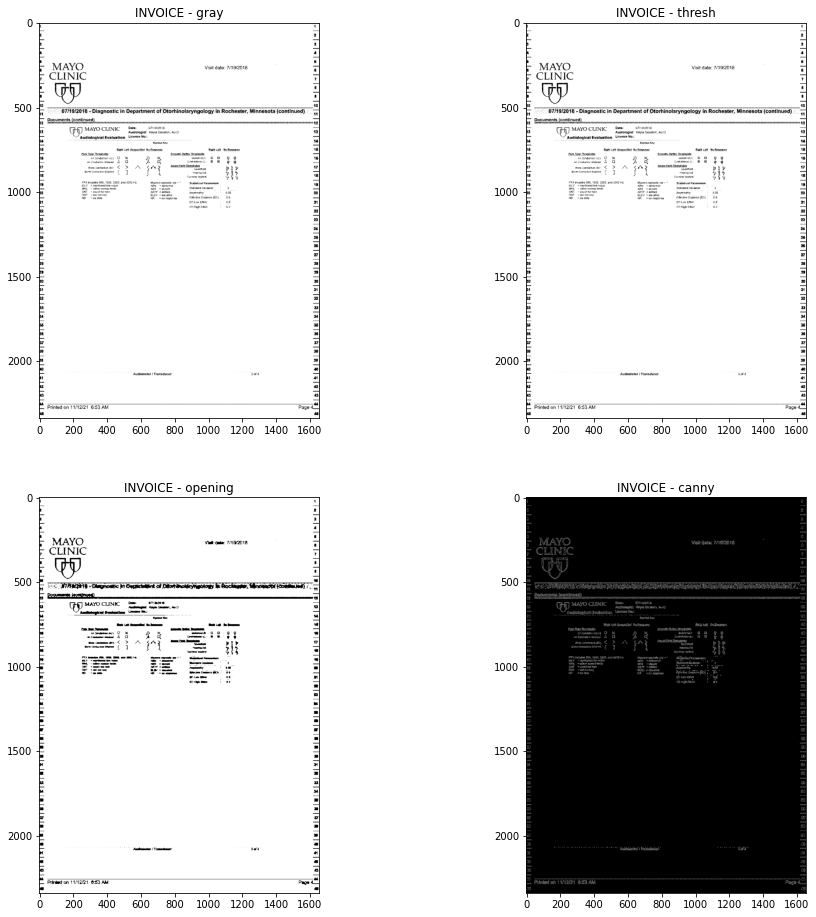

In [13]:
# Plot images after preprocessing
fig = plt.figure(figsize=(16,16))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('INVOICE - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')    

In [14]:
# Get OCR output using Pytesseract
custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& : 6
~ MAYO Visit date: 7/19/2018 Tz
7 CLINIC 7
4 | 4
5 i
10 416
“ §7/19/2018 Diagnostic in Department. of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) —_
— SAA CLINIC Bate: args —
13 ry MAYO CLINIC Audiologist: Kay Goulson, Au D 43
a _ “’Audiclogical Evatuation Vleanse Noe
Lad Symbol Key “
16 Righe Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbotds Acquatle Relies Treatwlsta _—
16 An Cendumen ac) GFK oo % fosdaterat Lo go Oo 416
_ arioactemened A 0 4 fay en a —
17 Brae contre: << AN Cw? SSUDA EAE TSS p i 17
— Bong Costhrten (asked f 7 r i Mowing Ak Bg 4 Ay —_—
18 . ’ ee ieee ES 18
_ PTA incites §00, 1000. 2069, and 3000 HZ, Masked opposite sar <7 ‘StaGatical Parameters le
19 MLV © morHared live voica ABN > abRoTma! 18
— WAL. within nota teite ABS» absent Standard Deviation 2 —_
20 But 

In [15]:
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> GRAY IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images["gray"], config=custom_config))


-----------------------------------------
TESSERACT OUTPUT --> GRAY IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& : 6
~ MAYO Visit date: 7/19/2018 Tz
7 CLINIC 7
4 | 4
5 i
10 416
“ §7/19/2018 Diagnostic in Department. of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) —_
— SAA CLINIC Bate: args —
13 ry MAYO CLINIC Audiologist: Kay Goulson, Au D 43
a _ “’Audiclogical Evatuation Vleanse Noe
Lad Symbol Key “
16 Righe Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbotds Acquatle Relies Treatwlsta _—
16 An Cendumen ac) GFK oo % fosdaterat Lo go Oo 416
_ arioactemened A 0 4 fay en a —
17 Brae contre: << AN Cw? SSUDA EAE TSS p i 17
— Bong Costhrten (asked f 7 r i Mowing Ak Bg 4 Ay —_—
18 . ’ ee ieee ES 18
_ PTA incites §00, 1000. 2069, and 3000 HZ, Masked opposite sar <7 ‘StaGatical Parameters le
19 MLV © morHared live voica ABN > abRoTma! 18
— WAL. within nota teite ABS» absent Standard Deviation 2 —_
20 But sad

In [16]:
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images["thresh"], config=custom_config))


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& : 6
~ MAYO Visit date: 7/19/2018 Tz
7 CLINIC 7
4 | 4
5 i
10 416
“ §7/19/2018 Diagnostic in Department. of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) —_
— SAA CLINIC Bate: args —
13 ry MAYO CLINIC Audiologist: Kay Goulson, Au D 43
a _ “’Audiclogical Evatuation Vleanse Noe
Lad Symbol Key “
16 Righe Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbotds Acquatle Relies Treatwlsta _—
16 An Cendumen ac) GFK oo % fosdaterat Lo go Oo 416
_ arioactemened A 0 4 fay en a —
17 Brae contre: << AN Cw? SSUDA EAE TSS p i 17
— Bong Costhrten (asked f 7 r i Mowing Ak Bg 4 Ay —_—
18 . ’ ee ieee ES 18
_ PTA incites §00, 1000. 2069, and 3000 HZ, Masked opposite sar <7 ‘StaGatical Parameters le
19 MLV © morHared live voica ABN > abRoTma! 18
— WAL. within nota teite ABS» absent Standard Deviation 2 —_
20 

In [17]:
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images["opening"], config=custom_config))


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
4 4
z zr
3 a
4 4
‘ / ‘
~ MAYO Viet aber, 7/4 72018 >
, CLINIC 7
. 1.
. ,
= “
- Saimin]
— One wou _
o (ry) MAYO CLINIC Paatietegint: Lip Guana, A 0 a
vy ~~ haatiaiegicel Penbention ‘hemes “
| es Let Sei! Bo eee Get Lt Oe See “
— Cam de teehee (pets bet Destin _—
= As does a Ot ae 6OUO q -_
_—_ aw Contactor mod AO 4 zt —c F H ® , —
T pee cee COA mn cn Col Rote pir T
Cente leapt

ee ee hineaes pois gu * ‘Weataationed Pymeainars. 7 =
"= ed —w- — - "=
— a = saw wen =
= “aaa >: oo weer a =
—  ~ andes wR 5 ps oes Ce —_
a] 2 Lee ee an HH
_ CC Hage oe | oer _
= Ez
n go
ad mm
= mn
= nm
= ¥
= nn
= =
= a
+ x
= z
u u
ry ”
= a
= a
7 Bd
= a
" =
a =
— elects | Canaan tefd _
A #1
a =
a a
Xe
— Prineed an 11/12/21 6-03 AM Pee 4__
a =



In [18]:
print('TESSERACT OUTPUT --> CANNY IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images["canny"], config=custom_config))

TESSERACT OUTPUT --> CANNY IMAGE
-----------------------------------------
fl ci

ay Py

rs} a

A) Fay

6 aC 7 ae is

> MAYO ee are ,

eT ark Sam _
2 Cc wil I ike 2

e fae
-_ iq ) ig; ) _
9 <i On i)

— LN —
ag Shee OTMIM201G 2 Olognosiic linsbep ammisni sch Otorhimaldiamgaloehy in Roches tines comlnued) 2. —
19 {Dacre eh (Cem ese eS SS SS Oe SES SS Seo oF 525s
na. em me CT NOE Oe Rt Go Prana! —_
ks} oa eee LS PRN oe mrt ee OT qa
19 Seng &
tS een ea eee ceed Peers eee ed Sey
a Pen Ne rc Felon econ ea =
re) Pee ee rs ee aes @ @ IG
_ ne eas ae & cay ; <mpar: @ OB Bai —
V7 wt coe 80 ras A fe 2 ac f Be a
a eee cae : fi H Det oe Gigs, 8 *, —
cr] : / ° a ae a % % 18
a a es Aga = lam ed _—
aa oe een ee ean oe ee =
aul Co ne 54
= Be ae as =
FR z2
2) ra)
Zia) 7s)
ang ou?
rae XD
SG) F300]
a a
rS}S) ea]
al ay
Se r6
ag Fava
3) a
ac) ra)
~~ ar aL eee ee erred cre as
A a
a2) raz}
as ra
me an Ke Or Page 4—
6) ra



In [19]:
print('TESSERACT OUTPUT --> NOISY IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(noise, config=custom_config))

TESSERACT OUTPUT --> NOISY IMAGE
-----------------------------------------
4 4
2 2
3 3
4 4
6 6
. M AYO Vantdate T1b2C1E 7
os tist _
> CLINIC ?
6 [ : e
8 8
Oe 80
" 07/19/2018 - Diagnostic in Department of Otorhinolaryngology in Rochester, Minnesota (continued) rT
T, Oocuments (continued) —
12 42
gc AYO) - Ouwte a4
1 ree, MAYO CLINIC pamooget bara tut & 43
— ’ Rucological Evaluation bens No —
“ tenen “
16 Maye a Beye te a rage ene, Bagh 7 Crag oe 6
— Oye Care ee ety Alot Meter Seat —
6 Bee ON wo wwe & 2 & G 6
wt wer OL mh ees 8 OM |g
7 at wagte sO ew? fees Ed eee ek ply 47
a Roe ten kee : : \ aos ety .
* ete meted “hy *
19 eee Ot Ya at Seen Sameer 19
_— AS ate venus yoo Caer coat . _
20 » ae ae tae cette aumeete tot 2
_ won wow wut ue —
Fa] tom te * m
_ sete —
2 2
23 3
24 “
6 1s
2s s
7 a
. 7
” 2
30 x
3 a
32 az
33 x
4 “
% oT
* s
av v7
8 ey
38 -
“ o
— As ceometes Trae tue et eet —
4 “
a2 a
a3 a
“ sgae * “
_ Painted on '1.12'2' 653 AM Page 4
“ “



In [20]:
print('TESSERACT OUTPUT --> DILATED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(dilated, config=custom_config))

TESSERACT OUTPUT --> DILATED IMAGE
-----------------------------------------
+ .
a 4
F F

re =
re ‘ ‘ f

Fort

: ‘ en

a0 7

{ Hy t
’ : ! ’
1: 1

I Be Pet moe tits | edb toy. oi et : i vod
i 1
1t 1T
1% 1%
Lobe

14 14
r r
1 . 1
“4 4
os 4
ad ad
cr or
ar. ae
Th 4
1 1
wy vy
4 a
u ua
“4 “s
at AL
ra a
a, 4
a 4
aa aa
a a



##Removing noise using `fastNlMeansDenoising`

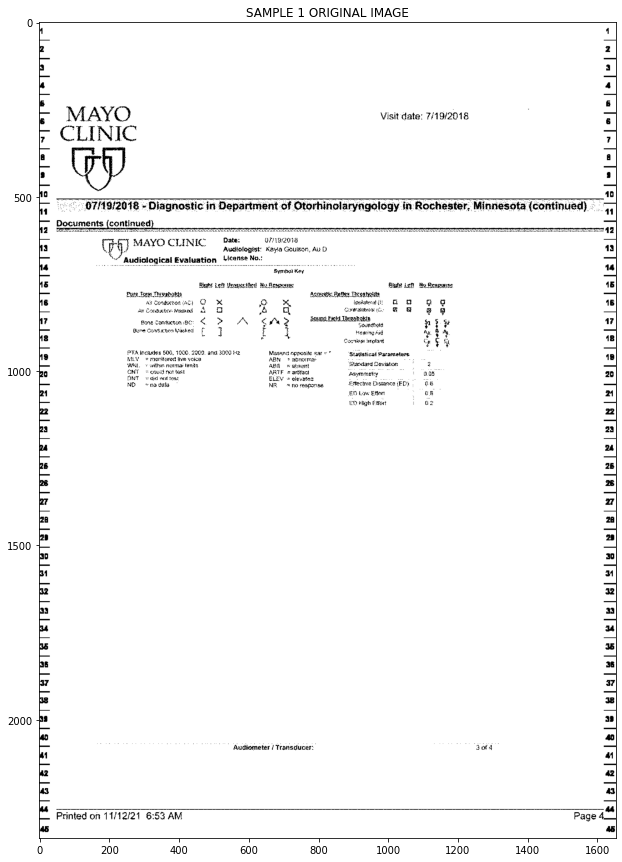

In [27]:
# Plot original image
image = cv2.imread(image_name)
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(30,15))
plt.imshow(image)
plt.title('SAMPLE 1 ORIGINAL IMAGE')
plt.show()

###Step 1

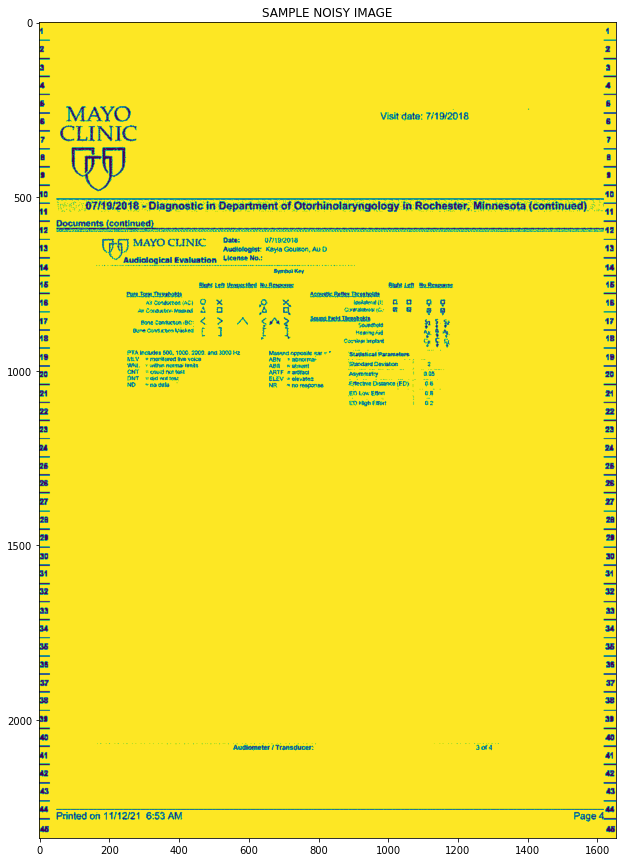

In [28]:
# Plot original image
image = cv2.imread(image_name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

noise_removed = cv2.fastNlMeansDenoising(gray, 31, 7, 21)
plt.figure(figsize=(30, 15))
plt.imshow(noise_removed)
plt.title('SAMPLE DENOISY IMAGE')
plt.show()

In [29]:
print('TESSERACT OUTPUT --> DENOISE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(noise_removed, config=custom_config))

TESSERACT OUTPUT --> DENOISE IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& : 6
~ MAYO Visit date: 7/19/2018 Tz
7 CLINIC 7
4 | 4
5 i
10 416
“ §7/19/2018 Diagnostic in Department. of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) —_
— SAA CLINIC Bate: args —
13 ry MAYO CLINIC Audiologist: Kay Goulson, Au D 43
a _ “’Audiclogical Evatuation Vleanse Noe
Lad Symbol Key “
16 Righe Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbotds Acquatle Relies Treatwlsta _—
16 An Cendumen ac) GFK oo % fosdaterat Lo go Oo 416
__ arioactemened A 0 4 fay en a —
17 Brae contre: << AN Cw? SSUDA EAE TSS p i 17
— Bong Costhrten (asked f 7 r i Mowing Ak Bg 4 Ay —_—
18 . ’ ee ieee ES 18
_ PTA incites §00, 1000. 2069, and 3000 HZ, Masked opposite sar <7 ‘StaGatical Parameters le
19 MLV © morHared live voica ABN > abRoTma! 18
— WAL. within nota teite ABS» absent Standard Deviation 2 —_
20 But sadaeeiea Oe each easymmelty as 20
—_ ND ~

###Step 2

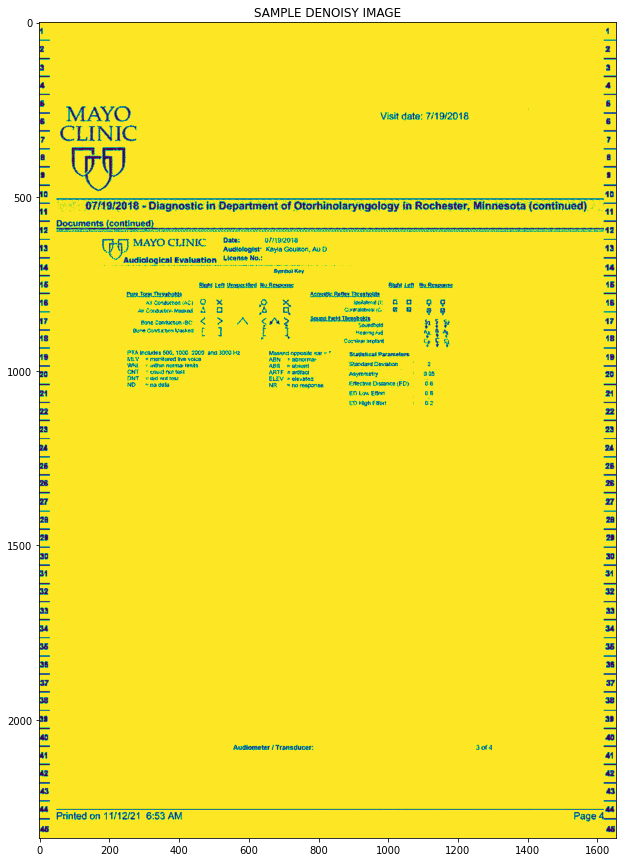

In [30]:
# Plot original image
image = cv2.imread(image_name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

noise_removed = cv2.fastNlMeansDenoising(gray, None, 31, 7, 21)
plt.figure(figsize=(30, 15))
plt.imshow(noise_removed)
plt.title('SAMPLE DENOISY IMAGE')
plt.show()

In [31]:
print('TESSERACT OUTPUT --> DENOISE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(noise_removed, config=custom_config))

TESSERACT OUTPUT --> DENOISE IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& 5
~ MAYO Visit date: 7/19/2018 Tz
7, CLINIC 7
4 | 4
5 i
10 416
vs §7/19/2018 ~ Diagnostic in Department of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) _
— SAA CLINIC Bate: arngenia —
13 ry MAYO CLINIC Audiologist’ Kay Goulson, Au D 44
a ““Audialogical Evaluation beense Nee
Lad Symbol Key “
16 Rahs Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbots Acoust Relies Teeatwista _—
16 Ag Cendurmen cy GFK oe % fosdaterat EF go Oo 416
__ artoactemned A 0 4 fay convame i GB —
17 Bre conten << AN owe? SaUDA Eat Temes p i¥ 17
— Bong Coston Masked f 7 r i Meeiing dnd Bg 4 Ky —_—
18 . ’ ees ieee ES 18
_ PTA incites §00, 1000. 2060. and 3000 HZ, Masked opposite sar © 7 StaGatical Parameters le
19 MLV © monkared live voica ABN > Abra! 18
— WAS within norma tate ARS» absent Standard Deviation 2 _
20 Bet oda Bare renter symmety acs 20
— ND ~nada

###Step 3

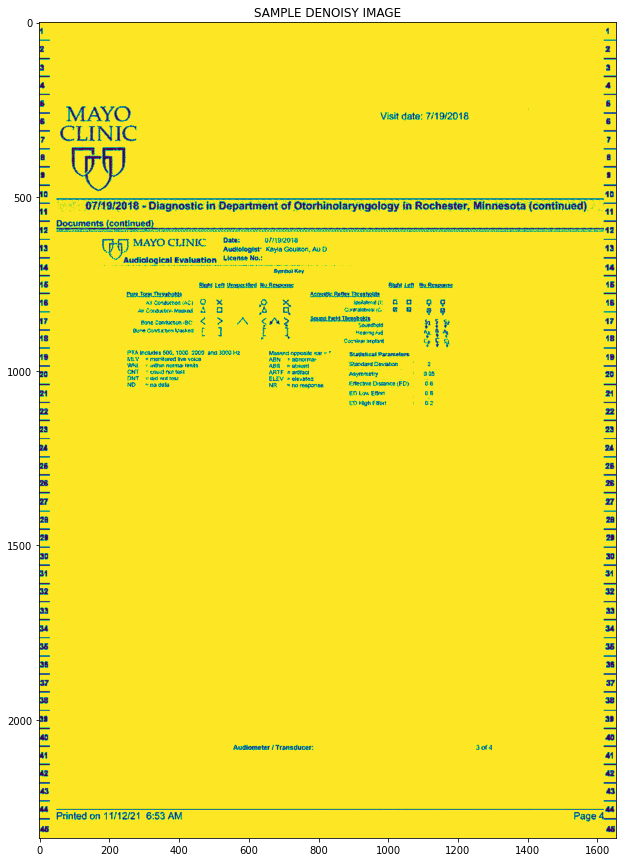

In [32]:
# Plot original image
image = cv2.imread(image_name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

empty_gray = np.empty(gray.shape, np.uint8)
noise_removed = cv2.fastNlMeansDenoising(gray, empty_gray, 31, 7, 21)
plt.figure(figsize=(30, 15))
plt.imshow(noise_removed)
plt.title('SAMPLE DENOISY IMAGE')
plt.show()

In [33]:
print('TESSERACT OUTPUT --> DENOISE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(noise_removed, config=custom_config))

TESSERACT OUTPUT --> DENOISE IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& 5
~ MAYO Visit date: 7/19/2018 Tz
7, CLINIC 7
4 | 4
5 i
10 416
vs §7/19/2018 ~ Diagnostic in Department of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) _
— SAA CLINIC Bate: arngenia —
13 ry MAYO CLINIC Audiologist’ Kay Goulson, Au D 44
a ““Audialogical Evaluation beense Nee
Lad Symbol Key “
16 Rahs Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbots Acoust Relies Teeatwista _—
16 Ag Cendurmen cy GFK oe % fosdaterat EF go Oo 416
__ artoactemned A 0 4 fay convame i GB —
17 Bre conten << AN owe? SaUDA Eat Temes p i¥ 17
— Bong Coston Masked f 7 r i Meeiing dnd Bg 4 Ky —_—
18 . ’ ees ieee ES 18
_ PTA incites §00, 1000. 2060. and 3000 HZ, Masked opposite sar © 7 StaGatical Parameters le
19 MLV © monkared live voica ABN > Abra! 18
— WAS within norma tate ARS» absent Standard Deviation 2 _
20 Bet oda Bare renter symmety acs 20
— ND ~nada

###Step 4

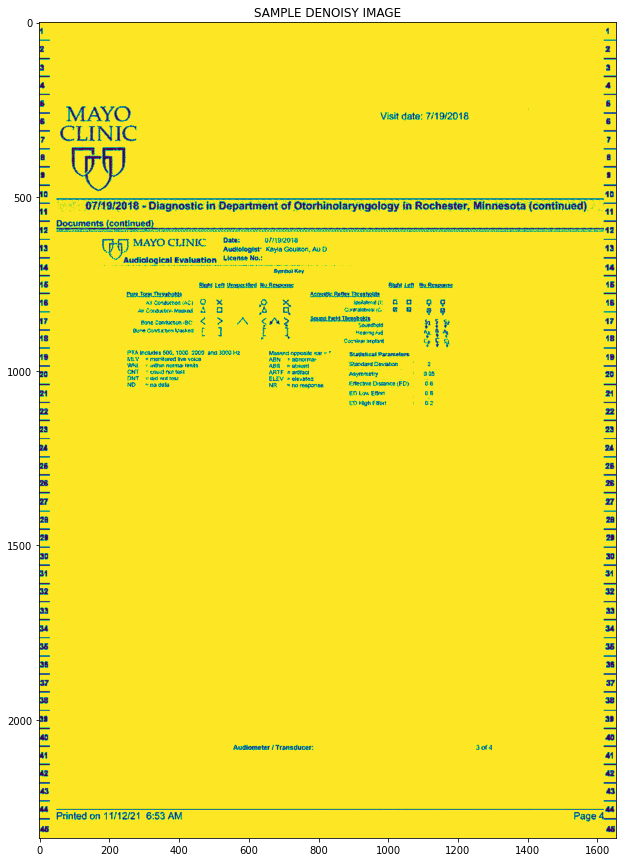

In [34]:
# Plot original image
image = cv2.imread(image_name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

noise_removed = cv2.fastNlMeansDenoising(gray, h=31, templateWindowSize=7, searchWindowSize=21)
plt.figure(figsize=(30, 15))
plt.imshow(noise_removed)
plt.title('SAMPLE DENOISY IMAGE')
plt.show()

In [35]:
print('TESSERACT OUTPUT --> DENOISE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(noise_removed, config=custom_config))

TESSERACT OUTPUT --> DENOISE IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& 5
~ MAYO Visit date: 7/19/2018 Tz
7, CLINIC 7
4 | 4
5 i
10 416
vs §7/19/2018 ~ Diagnostic in Department of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) _
— SAA CLINIC Bate: arngenia —
13 ry MAYO CLINIC Audiologist’ Kay Goulson, Au D 44
a ““Audialogical Evaluation beense Nee
Lad Symbol Key “
16 Rahs Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbots Acoust Relies Teeatwista _—
16 Ag Cendurmen cy GFK oe % fosdaterat EF go Oo 416
__ artoactemned A 0 4 fay convame i GB —
17 Bre conten << AN owe? SaUDA Eat Temes p i¥ 17
— Bong Coston Masked f 7 r i Meeiing dnd Bg 4 Ky —_—
18 . ’ ees ieee ES 18
_ PTA incites §00, 1000. 2060. and 3000 HZ, Masked opposite sar © 7 StaGatical Parameters le
19 MLV © monkared live voica ABN > Abra! 18
— WAS within norma tate ARS» absent Standard Deviation 2 _
20 Bet oda Bare renter symmety acs 20
— ND ~nada

##Removing blur using `bilateralFilter`

###Step 1

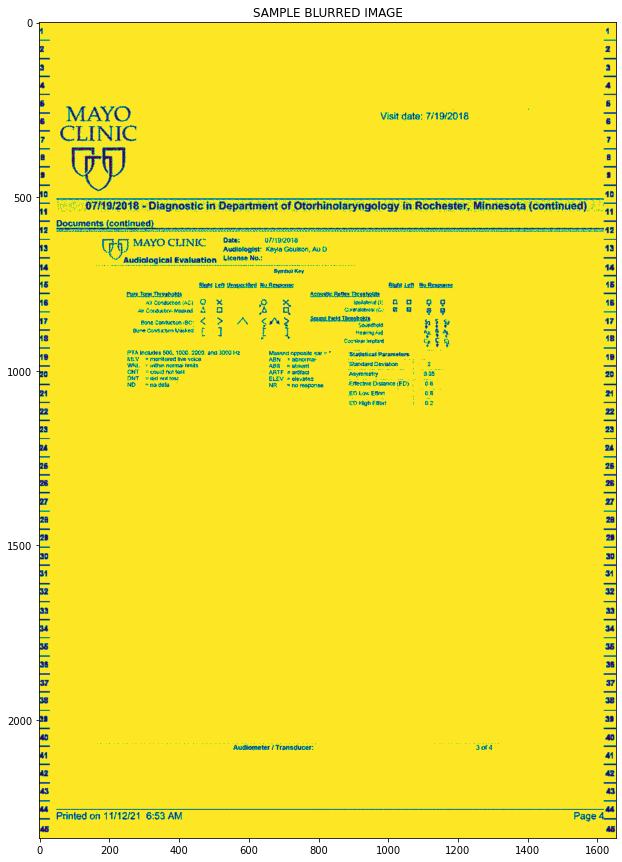

In [36]:
# Plot original image
image = cv2.imread(image_name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = blur = cv2.bilateralFilter(gray, 31, 7, 21)
plt.figure(figsize=(30, 15))
plt.imshow(blurred)
plt.title('SAMPLE BLURRED IMAGE')
plt.show()

In [37]:
print('TESSERACT OUTPUT --> BLURRED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(blurred, config=custom_config))

TESSERACT OUTPUT --> BLURRED IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& 5
~ MAYO Visit date: 7/19/2018 Tz
7, CLINIC 7
4 | 4
5 i
10 416
vs §7/19/2018 ~ Diagnostic in Department of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) _
— SAA CLINIC Bate: arngenia —
13 ry MAYO CLINIC Audiologist’ Kay Goulson, Au D 44
a ““Audialogical Evaluation beense Nee
Lad Symbol Key “
16 Rahs Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbots Acoust Relies Teeatwista _—
16 Ag Cendurmen cy GFK oe % fosdaterat EF go Oo 416
__ artoactemned A 0 4 fay convame i GB —
17 Bre conten << AN owe? SaUDA Eat Temes p i¥ 17
— Bong Coston Masked f 7 r i Meeiing dnd Bg 4 Ky —_—
18 . ’ ees ieee ES 18
_ PTA incites §00, 1000. 2060. and 3000 HZ, Masked opposite sar © 7 StaGatical Parameters le
19 MLV © monkared live voica ABN > Abra! 18
— WAS within norma tate ARS» absent Standard Deviation 2 _
20 Bet oda Bare renter symmety acs 20
— ND ~nada

###Step 2

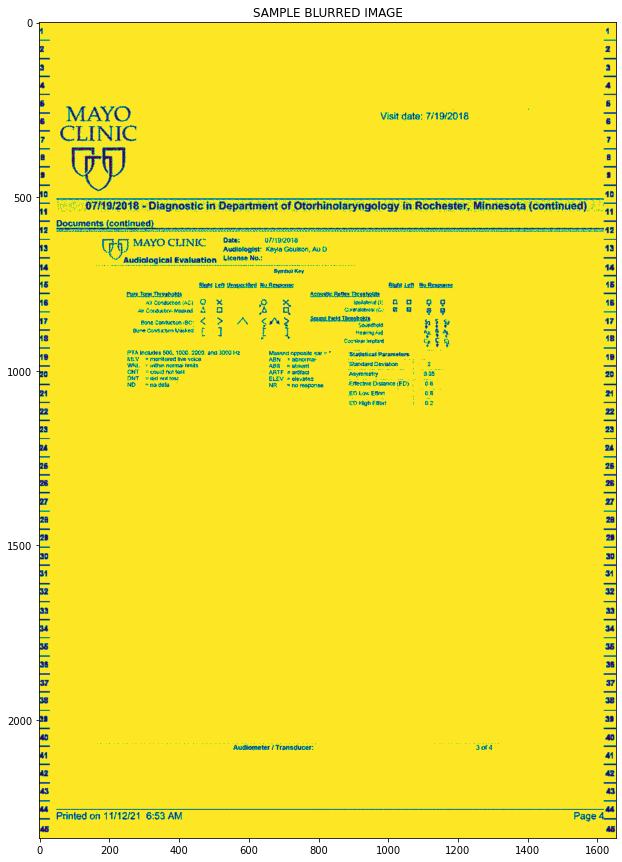

In [38]:
# Plot original image
image = cv2.imread(image_name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.bilateralFilter(gray, 31, 7, 21, None)
plt.figure(figsize=(30, 15))
plt.imshow(blurred)
plt.title('SAMPLE BLURRED IMAGE')
plt.show()

In [40]:
print('TESSERACT OUTPUT --> BLURRED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(blurred, config=custom_config))

TESSERACT OUTPUT --> BLURRED IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& : 6
~ MAYO Visit date: 7/19/2018 Tz
7 CLINIC 7
4 | 4
5 i
10 416
“ §7/19/2018 Diagnostic in Department. of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) —_
— SAA CLINIC Bate: args —
13 ry MAYO CLINIC Audiologist: Kay Goulson, Au D 43
a _ “’Audiclogical Evatuation Vleanse Noe
Lad Symbol Key “
16 Righe Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbotds Acquatle Relies Treatwlsta _—
16 An Cendumen ac) GFK oo % fosdaterat Lo go Oo 416
_ arioactemened A 0 4 fay en a —
17 Brae contre: << AN Cw? SSUDA EAE TSS p i 17
— Bong Costhrten (asked f 7 r i Mowing Ak Bg 4 Ay —_—
18 . ’ ee ieee ES 18
_ PTA incites §00, 1000. 2069, and 3000 HZ, Masked opposite sar <7 ‘StaGatical Parameters le
19 MLV © morHared live voica ABN > abRoTma! 18
— WAL. within nota teite ABS» absent Standard Deviation 2 —_
20 But sadaeeiea Oe each easymmelty as 20
—_ ND ~n

###Step 3

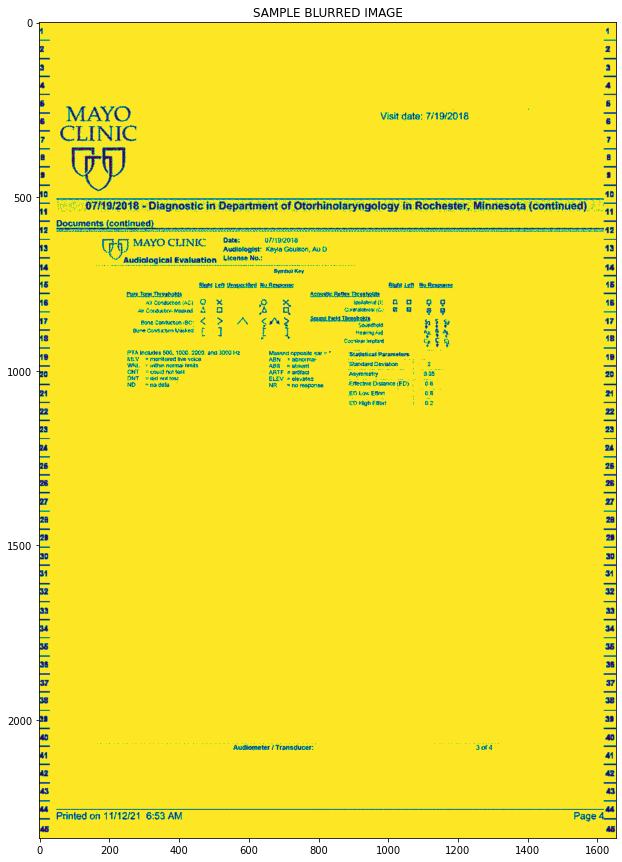

In [41]:
# Plot original image
image = cv2.imread(image_name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur_ = np.empty(gray.shape, np.uint8)
blurred = cv2.bilateralFilter(gray, 31, 7, 21, blur_)
plt.figure(figsize=(30, 15))
plt.imshow(blurred)
plt.title('SAMPLE BLURRED IMAGE')
plt.show()

In [42]:
print('TESSERACT OUTPUT --> BLURRED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(blurred, config=custom_config))

TESSERACT OUTPUT --> BLURRED IMAGE
-----------------------------------------
4 4

Z 2
a a
4 4
& : 6
~ MAYO Visit date: 7/19/2018 Tz
7 CLINIC 7
4 | 4
5 i
10 416
“ §7/19/2018 Diagnostic in Department. of Otorhinolaryngology in Rochester, Minnesota (continued) n
~, Documents (continued) —_
— SAA CLINIC Bate: args —
13 ry MAYO CLINIC Audiologist: Kay Goulson, Au D 43
a _ “’Audiclogical Evatuation Vleanse Noe
Lad Symbol Key “
16 Righe Lett Ynapeciited Ms Responses Right Left Ry Response 16
— Pure Tom Thevsbotds Acquatle Relies Treatwlsta _—
16 An Cendumen ac) GFK oo % fosdaterat Lo go Oo 416
_ arioactemened A 0 4 fay en a —
17 Brae contre: << AN Cw? SSUDA EAE TSS p i 17
— Bong Costhrten (asked f 7 r i Mowing Ak Bg 4 Ay —_—
18 . ’ ee ieee ES 18
_ PTA incites §00, 1000. 2069, and 3000 HZ, Masked opposite sar <7 ‘StaGatical Parameters le
19 MLV © morHared live voica ABN > abRoTma! 18
— WAL. within nota teite ABS» absent Standard Deviation 2 —_
20 But sadaeeiea Oe each easymmelty as 20
—_ ND ~n